## Limpeza e Pré-Processamento dos Dados

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Carregando os dados
df = pd.read_csv('dados/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Verificando as primeiras linhas
print(df.head())

#Verificando os valores ausentes
print(df.isnull().sum())

#Substituição de 'No phone service' e 'No internet service' por 'No'
cols_to_replace = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_replace:
    df[col] = df[col].replace({'No phone service': 'No', 'No internet service': 'No'})

#Convertendo SeniorCitizen para categórico
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

#Tratando o TotalCharges (convertndo para numérico)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## Análise Exploratória dos Dados

#### Estatísticas Descritivas

In [8]:
#Variáveis numéricas
print(df.describe())

#Variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

customerID:
 customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender:
 gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen:
 SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

Partner:
 Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
 Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
 Phon

#### Taxa Global de Churn

Taxa de Churn:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


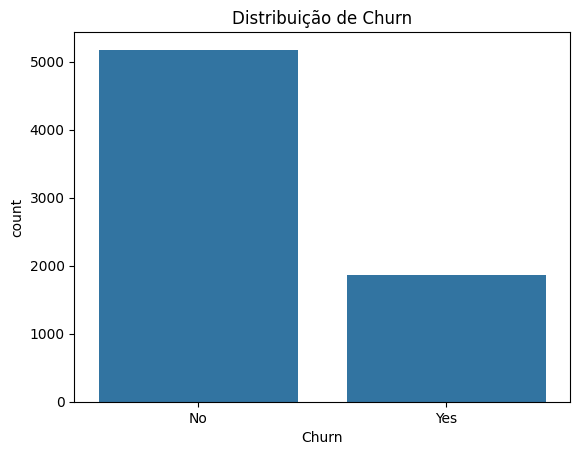

In [9]:
churn_rate = df['Churn'].value_counts(normalize=True)
print("Taxa de Churn:")
print(churn_rate)

sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

#### Dsitribuição de Churn por Categoria

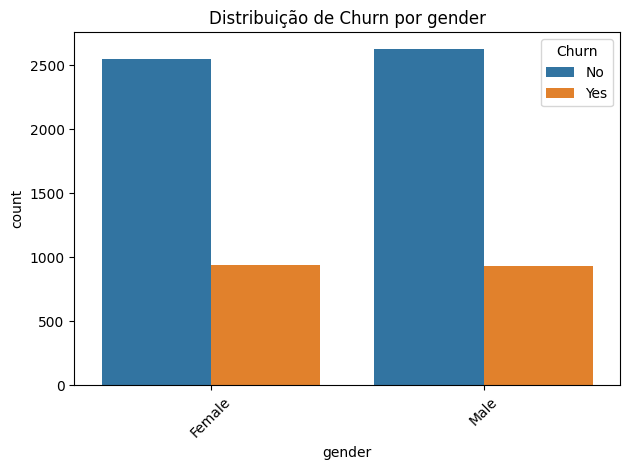

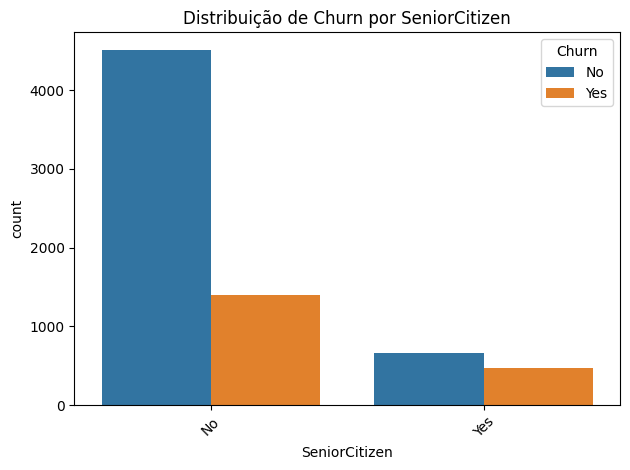

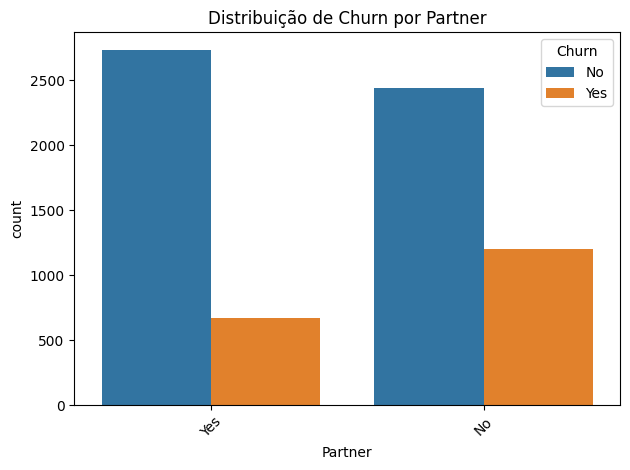

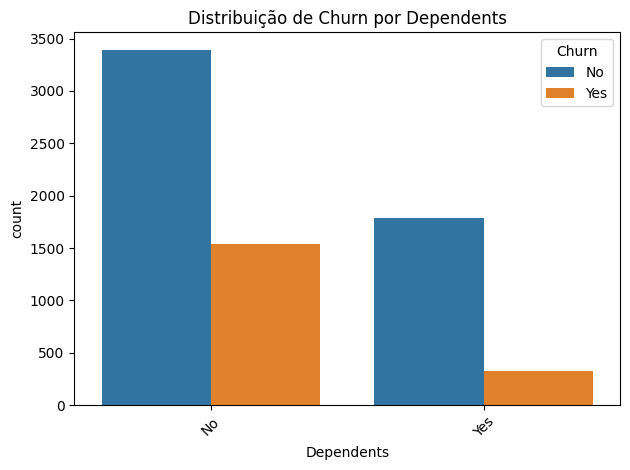

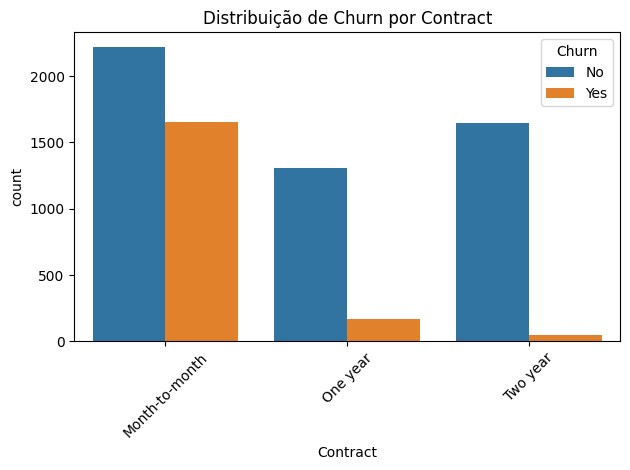

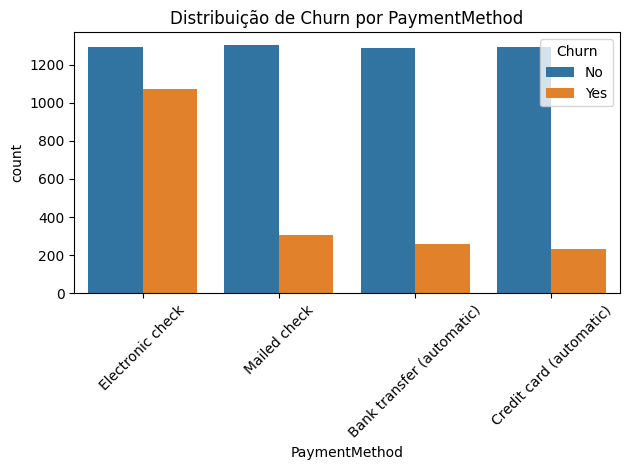

In [10]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod']

for feature in features:
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Distribuição de Churn por {feature}')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

#### Análise de Tenure

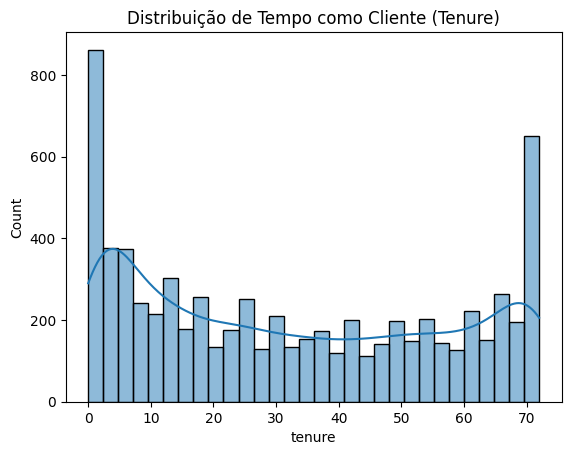

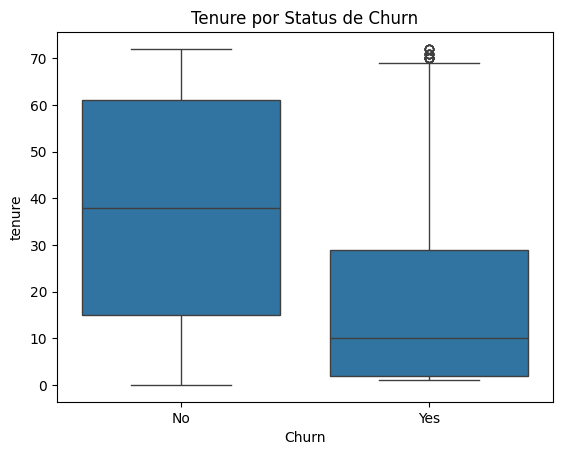

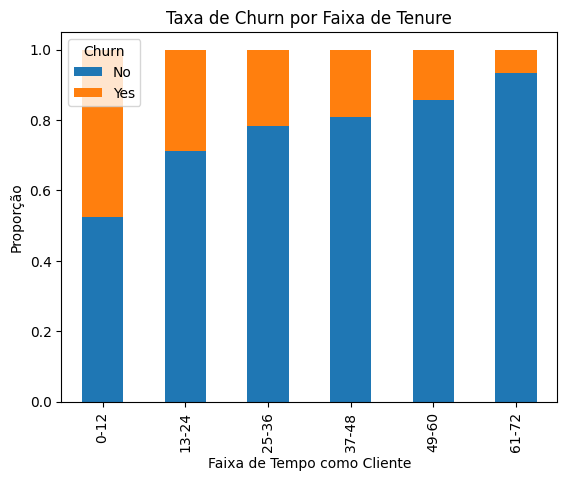

In [ ]:
#Histograma
sns.histplot(data=df, x='tenure', bins=30, kde=True)
plt.title('Distribuição de Tempo como Cliente (Tenure)')
plt.show()

#Boxplot por Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure por Status de Churn')
plt.show()

#Taxa de churn por faixa de tenure
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=[
    '0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()
churn_by_tenure.plot(kind='bar', stacked=True)
plt.title('Taxa de Churn por Faixa de Tenure')
plt.xlabel('Faixa de Tempo como Cliente')
plt.ylabel('Proporção')
plt.legend(title='Churn')
plt.show()

#### Análise Financeira

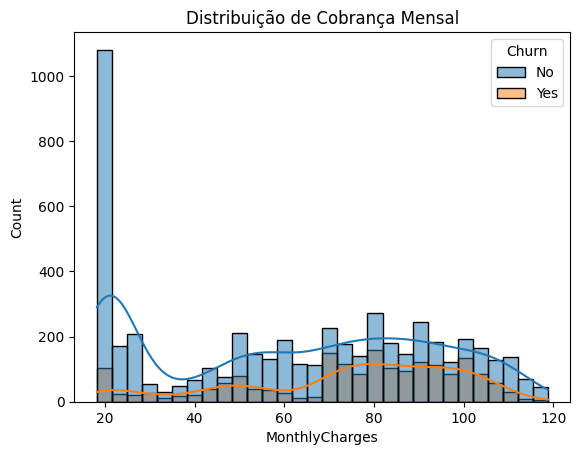

       MonthlyCharges  TotalCharges
Churn                              
No          61.265124   2549.911442
Yes         74.441332   1531.796094


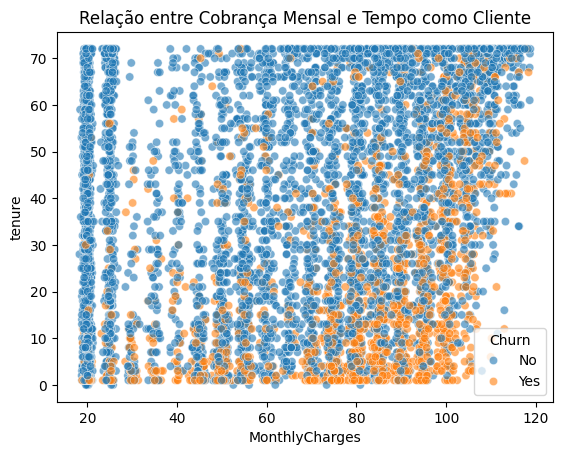

In [ ]:
#Distribuição de MonthlyCharges
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True)
plt.title('Distribuição de Cobrança Mensal')
plt.show()

#Média por status de churn
print(df.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean())

#Scatter plot entre cobrança mensal e tempo como cliente
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df, alpha=0.6)
plt.title('Relação entre Cobrança Mensal e Tempo como Cliente')
plt.show()